# Introduction to Scikitlearn
What will be covered:
0. End-to-end scikitlearn workflows
1. Getting data ready
2. Choose the right estimators/algorithm for our problems
3. Fit the estimators/algorithm to the data and make the predictions
4. Evaluating the models
5. Improve the models
6. Save and load the trained models
7. Putting it all together.

# 0. End-to-end ScikitLearn workflow

In [63]:
# 1. Get data ready
import pandas as pd
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [64]:
# Create X
X = heart_disease.drop("target", axis = 1)

# Create Y
y = heart_disease["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [65]:
# 2. Choose the estimators and models
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Keep default parameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
# 3. Fit the estimators/models to the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [69]:
y_test

232    0
59     1
278    0
229    0
135    1
      ..
71     1
63     1
115    1
18     1
267    0
Name: target, Length: 61, dtype: int64

In [70]:
# 4. Evaluation the model
clf.score(X_train, y_train)

1.0

In [71]:
clf.score(X_test, y_test)

0.7868852459016393

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       0.86      0.79      0.82        38

    accuracy                           0.79        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



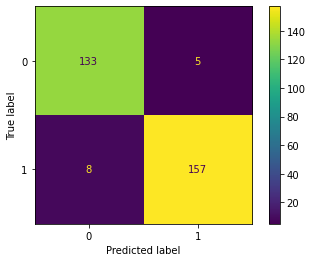

In [76]:
ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y)

In [33]:
confusion_matrix(y_test, y_preds)

array([[23,  8],
       [ 1, 29]], dtype=int64)

In [34]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [39]:
# 5. Improve the model
# Try different amount of estimator
import numpy as np
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Try model with {i} estimators")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f} %")
    print("")

Try model with 10 estimators
Model accuracy on test set: 83.61 %

Try model with 20 estimators
Model accuracy on test set: 78.69 %

Try model with 30 estimators
Model accuracy on test set: 81.97 %

Try model with 40 estimators
Model accuracy on test set: 81.97 %

Try model with 50 estimators
Model accuracy on test set: 81.97 %

Try model with 60 estimators
Model accuracy on test set: 83.61 %

Try model with 70 estimators
Model accuracy on test set: 83.61 %

Try model with 80 estimators
Model accuracy on test set: 85.25 %

Try model with 90 estimators
Model accuracy on test set: 80.33 %



In [40]:
# 6. Save the model and load it
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [41]:
# Load model
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test) # remember the last model

0.8032786885245902

# Car-sales dataset

# 1. Make sure data it all number

In [29]:
import pandas as pd
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales[:5]

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
len(car_sales)

1000

In [31]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [32]:
type(car_sales)

pandas.core.frame.DataFrame

In [33]:
# Split X, y
# import numpy as np
# np.random.seed(42)
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# from sklearn.model_selection import train_test_split
# X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
# Turn categories columns into the number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

category_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 category_features)], 
                                 remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [35]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [36]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [37]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [43]:
# Split proccessed training dataset
import numpy as np
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)

X_train.shape, y_train.shape

((800, 13), (800,))

In [44]:
# Build Machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

# 1.2. What if there is a missing value
* Fill missing value with some value
* Remove these missing value

In [2]:
# Import data with missing value
import pandas as pd
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Option 1: Fill missing value with pandas dataframe
--> NOT CORRECT METHOD (the transformed_X still contain Price)

In [4]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [5]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [6]:
# check the car_sales_missing
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [7]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace = True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [8]:
car_sales_missing.shape

(950, 5)

In [16]:
# Split data
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [22]:
# Turn categories columns into the number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Odometer (KM) now contain "missing" text need to be converted to number
category_features = ["Make", "Colour", "Doors", "Odometer (KM)"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 category_features)], 
                                 remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

<950x915 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [23]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [75]:
dummies = pd.get_dummies(car_sales_missing)
dummies

,Odometer (KM),Doors,Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,35431.0,4.0,15323.0,0,1,0,0,0,0,0,0,0,1,0
1,192714.0,5.0,19943.0,1,0,0,0,0,0,1,0,0,0,0
2,84714.0,4.0,28343.0,0,1,0,0,0,0,0,0,0,1,0
3,154365.0,4.0,13434.0,0,0,0,1,0,0,0,0,0,1,0
4,181577.0,3.0,14043.0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820.0,4.0,32042.0,0,0,0,1,0,1,0,0,0,0,0
996,155144.0,3.0,5716.0,0,0,0,0,1,0,0,0,0,1,0
997,66604.0,4.0,31570.0,0,0,1,0,0,0,1,0,0,0,0
998,215883.0,4.0,4001.0,0,1,0,0,0,0,0,0,0,1,0


## Option 2: Fill missing value with Scikit Learn

WORKED !!!

In [1]:
import pandas as pd
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [3]:
# Drop rows with no lable
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [4]:
# Split into X, y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [5]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [20]:
# Fill missing value with Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill category value with "missing" and number value with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create Imputers which fill the missing value
imputer = ColumnTransformer([
    ("car_features", cat_imputer, cat_features),
    ("door_feature", door_imputer, door_features),
    ("num_features", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
# filled_X = pd.DataFrame(filled_X)

In [21]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [22]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [24]:
 # Turn categories columns into the number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Odometer (KM) is num_feature
category_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 category_features)], 
                                 remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [25]:
pd.DataFrame(transformed_X)

,0
0,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 6)\t1.0\n (0, 13)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 11)\t1.0\n..."
...,...
945,"(0, 3)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
946,"(0, 4)\t1.0\n (0, 9)\t1.0\n (0, 11)\t1.0\n..."
947,"(0, 2)\t1.0\n (0, 6)\t1.0\n (0, 12)\t1.0\n..."
948,"(0, 1)\t1.0\n (0, 9)\t1.0\n (0, 12)\t1.0\n..."


In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)
X_train.shape, y_train.shape

# Build Machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

# 2. Choosing the right models/estimators

Use Scikit Lean model maps: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## 2.1 Picking Machine Learning model for regression problems

Let use Califorlia Housing dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [1]:
# Get dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
import pandas as pd
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
# Add label column
housing_df["Target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [6]:
# housing_df = housing_df.drop("MedHouseVal", axis = 1)
# housing_df

In [7]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [8]:
# Import algorithm
from sklearn.linear_model import Ridge

# Set up the random seed
import numpy as np
np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] # median housing price * 100,000$

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the models
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.5758549611440126

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [10]:
# Follow the Sklearn map to choose another model --> Suggest to use Ensemble Method --> But it need more time to predict
# Import algorithm
from sklearn.ensemble import RandomForestRegressor

# Set up the random seed
import numpy as np
np.random.seed(42)

# Create the data
X = housing_df.drop("Target", axis = 1)
y = housing_df["Target"] # median housing price * 100,000$

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate and fit the models
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model on the test set --> REGRESSION MODEL EVALUTAION MATRICES
model.score(X_test, y_test)

0.8065734772187598

`predict()` can be used for regression  

# 3. Make prediction

In [11]:
y_preds = model.predict(X_test)
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [12]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

# 4. Evaluating the model
There are three ways of evaluating Scikitlearn model
1. Use built-in score() method
2. Use scoring parameter
3. Problem-specific function
https://scikit-learn.org/stable/modules/model_evaluation.html

## Regression model evaluation
1. R-squared (coefficient of determination) - Default - Similar with accuracy in Classification model
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [13]:
# MAE 
# Compare the prediction to the ground truth
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [15]:
# Cross valuation score
from sklearn.model_selection import cross_val_score
# from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("Target", axis = 1)
y = housing_df["Target"]

# model = RandomForestRegression()

In [19]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv = 5, scoring = None)
np.mean(cv_r2)

0.6520824166120266

In [20]:
print(cv_r2)

[0.51682388 0.70279716 0.74197717 0.61638204 0.68243183]


# 4.3. Evaluation using Scikilearn fuction

In [24]:
# Classification model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Create X & y

# Split data

# Create models

# Fit models

# Make prediction

# Evaluate models using evaluate function
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f} %")
print(f"Accuracy: {precision_score(y_test, y_preds) * 100:.2f}")
print(f"Accuracy: {recall_score(y_test, y_preds) * 100:.2f}")
print(f"Accuracy: {f1_score(y_test, y_preds) * 100:.2f}")

Classifier metrics on the test set


ValueError: continuous is not supported

In [23]:
# Regression model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X & y

# Split data

# Create models

# Fit models

# Make prediction

# Evaluate models using evaluate function
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds) * 100:.2f} %")
print(f"MAE: {mean_absolute_error(y_test, y_preds) * 100:.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds) * 100:.2f}")
